### TODO:
* [Talvez não seja preciso, mas logo se verá] Fazer nominal value discretization às features "Zone", "Week Day" e "Month"

In [66]:
# Required libraries
import seaborn as sns
#import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../measurements.csv', encoding="utf-8", skipinitialspace=True)
df


,Zone,Datetime,Bandwidth,Upload Jitter,Download Jitter,Upload Packet Loss,Download Packet Loss,Upload Bit Rate (With TCP),Download Bit Rate (With TCP),Max Bit Rate (With TCP),One-Way Delay
0,europe-west1-b,Saturday 6 May 17:45,92.0 M,0.784,0.0,0.0,0,93.3 M,92.6 M,104.0 M,51.12
1,europe-west1-b,Saturday 6 May 17:48,91.4 M,0.832,0.0,0.0,0,80.4 M,79.2 M,94.4 M,14.53
2,europe-west1-b,Saturday 6 May 17:50,79.9 M,0.840,0.0,0.0,0,93.3 M,92.3 M,100.0 M,22.63
3,me-west1-a,Saturday 6 May 18:44,89.6 M,0.773,0.0,0.0,0,90.6 M,90.0 M,107.0 M,46.41
4,me-west1-a,Saturday 6 May 18:47,89.9 M,0.762,0.0,0.0,0,91.5 M,90.1 M,107.0 M,37.81
...,...,...,...,...,...,...,...,...,...,...,...
61,australia-southeast1-a,Wednesday 10 May 16:39,68.3 M,0.768,0.0,0.0,0,69.3 M,68.7 M,89.3 M,145.61
62,australia-southeast1-a,Wednesday 10 May 16:45,68.2 M,0.786,0.0,0.0,0,68.3 M,67.7 M,88.9 M,138.48
63,asia-east2-a,Wednesday 10 May 17:1,29.4 M,0.781,0.0,0.0,0,70.9 M,70.2 M,91.1 M,163.54
64,asia-east2-a,Wednesday 10 May 17:25,70.3 M,0.698,0.0,0.0,0,70.1 M,69.5 M,90.7 M,141.14


In [67]:
def parse_datetime(df):
    date_time_parts = df['Datetime'].str.split(' ')
    df['Week day'] = date_time_parts.str[0]
    df['Day'] = date_time_parts.str[1]
    df['Month'] = date_time_parts.str[2]
    time_parts = date_time_parts.str[3].str.split(':')
    df['Hour'] = time_parts.str[0]
    df['Minute'] = time_parts.str[1]

    df['Day'] = df['Day'].astype(str).astype(int)
    df['Hour'] = df['Hour'].astype(str).astype(int)
    df['Minute'] = df['Minute'].astype(str).astype(int)


parse_datetime(df)
df = df.drop("Datetime", axis=1)

In [68]:
variables_list = ["Bandwidth", "Upload Bit Rate (With UDP)", "Download Bit Rate (With UDP)",
                  "Max Bit Rate (With UDP)", "Upload Bit Rate (With TCP)",
                  "Download Bit Rate (With TCP)", "Max Bit Rate (With TCP)"]

#Converte as variáveis em "bits/sec"
def convert_variable(variables_list, df):
    scale = {'K': 10**3, 'M': 10**6, 'G': 10**9}
    for var in variables_list:
        if var in df.columns:
            col = df[var]
            num = col.str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)
            unit = col.str.extract(r'([KMG])', expand=False)
            if not unit.empty:
                unit = unit.map(scale)
                df[var] = num * unit



convert_variable(variables_list, df)



In [69]:
# Details about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          66 non-null     object 
 1   Bandwidth                     66 non-null     float64
 2   Upload Jitter                 66 non-null     float64
 3   Download Jitter               66 non-null     float64
 4   Upload Packet Loss            66 non-null     float64
 5   Download Packet Loss          66 non-null     int64  
 6   Upload Bit Rate (With TCP)    66 non-null     float64
 7   Download Bit Rate (With TCP)  66 non-null     float64
 8   Max Bit Rate (With TCP)       66 non-null     float64
 9   One-Way Delay                 66 non-null     float64
 10  Week day                      66 non-null     object 
 11  Day                           66 non-null     int32  
 12  Month                         66 non-null     object 
 13  Hour   

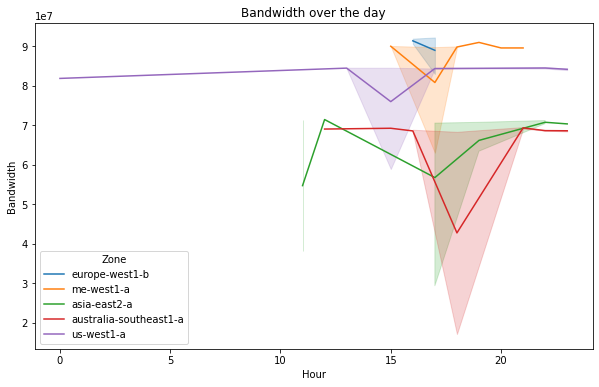

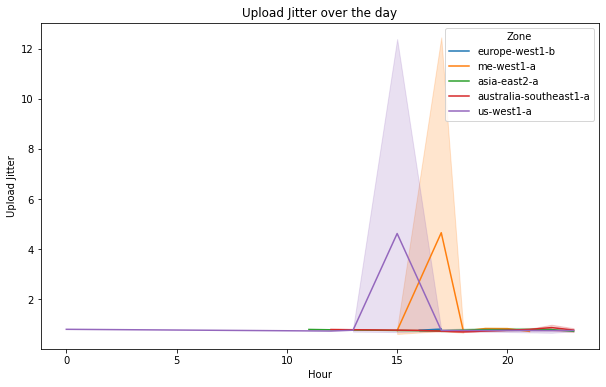

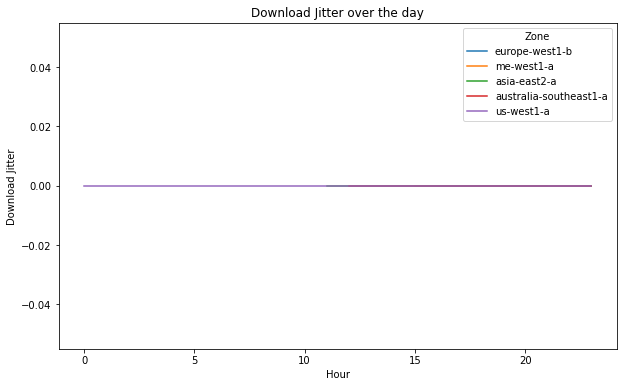

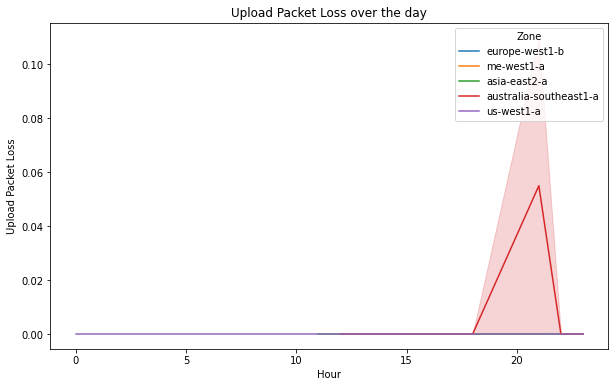

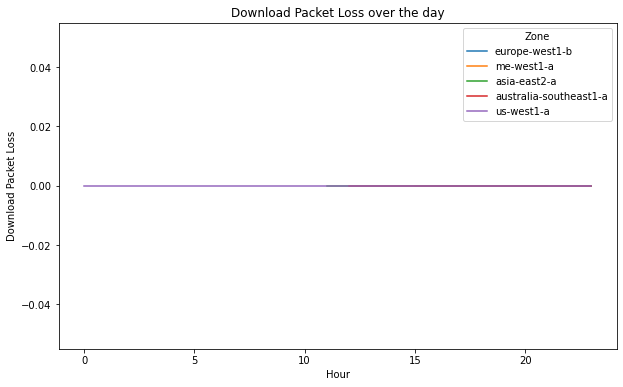

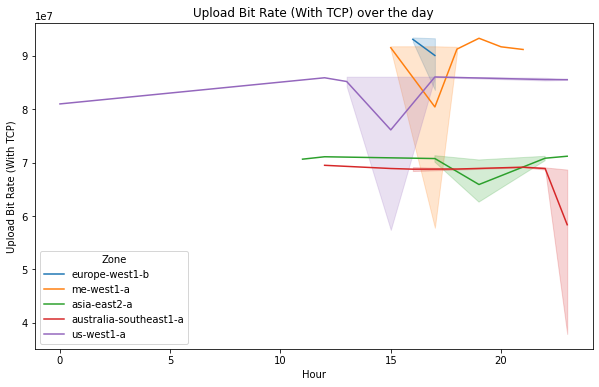

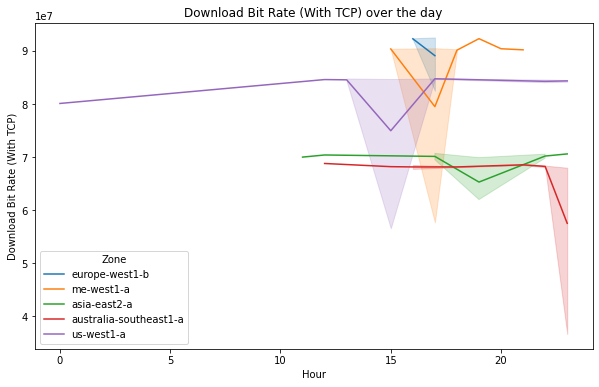

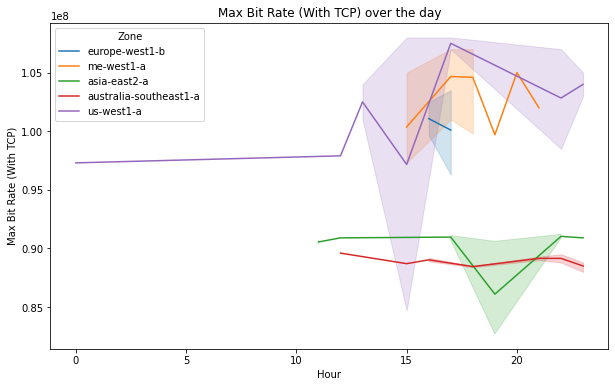

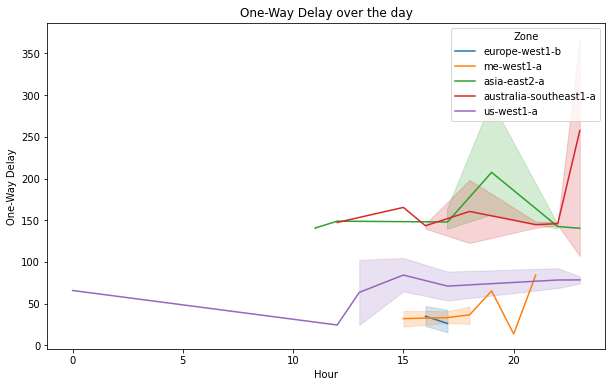

In [71]:
columns = ["Bandwidth", "Upload Jitter", "Download Jitter", "Upload Packet Loss", "Download Packet Loss",           
           "Upload Bit Rate (With TCP)", "Download Bit Rate (With TCP)", "Max Bit Rate (With TCP)", "One-Way Delay"]

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x='Hour', y=col, data=df, hue='Zone', ax=ax)
    ax.set_title(f"{col} over the day")
    ax.set_ylabel(col)
    ax.set_xlabel("Hour")
    #ax.ticklabel_format(style='plain', axis='y')
    plt.show()


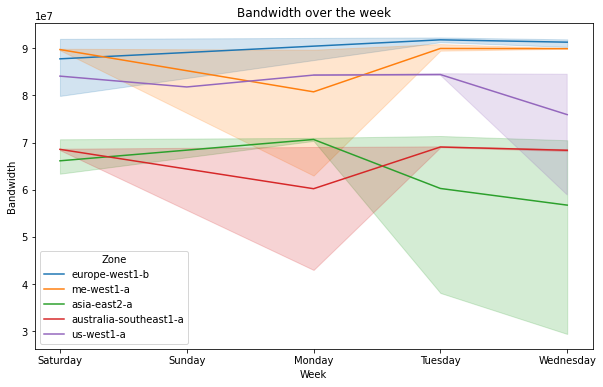

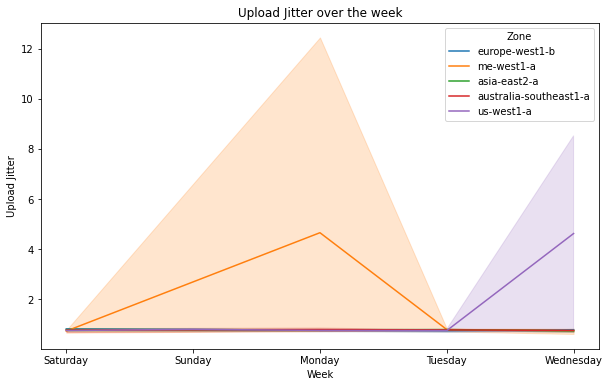

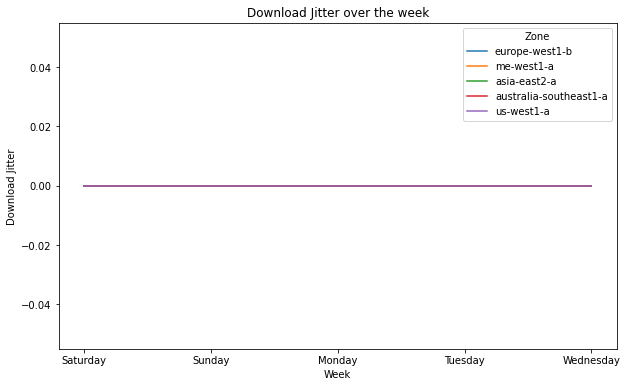

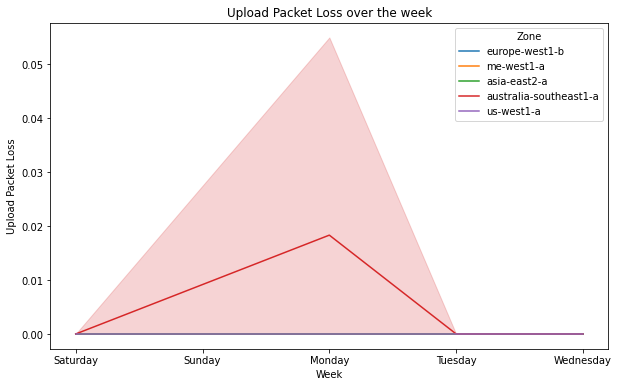

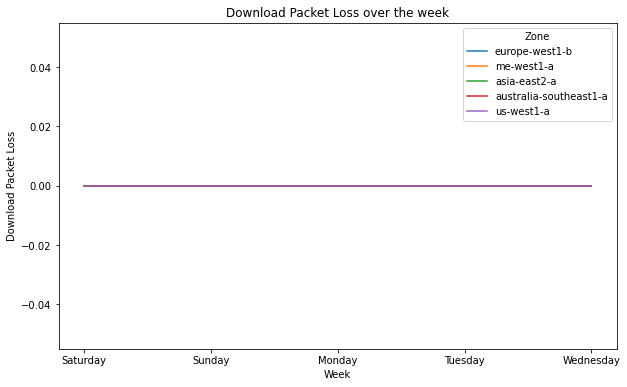

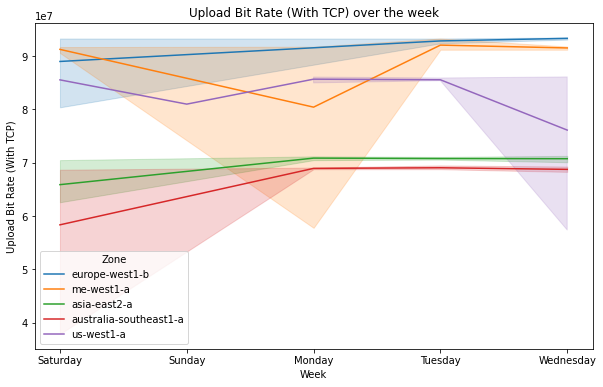

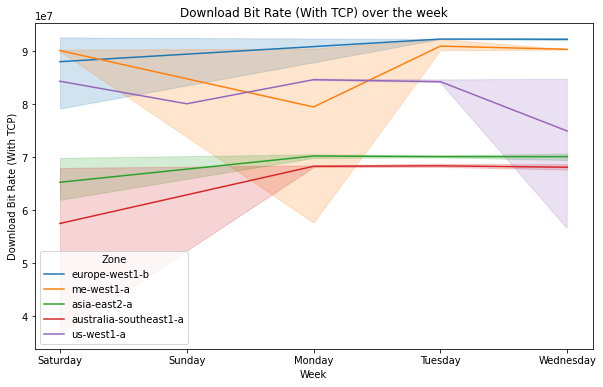

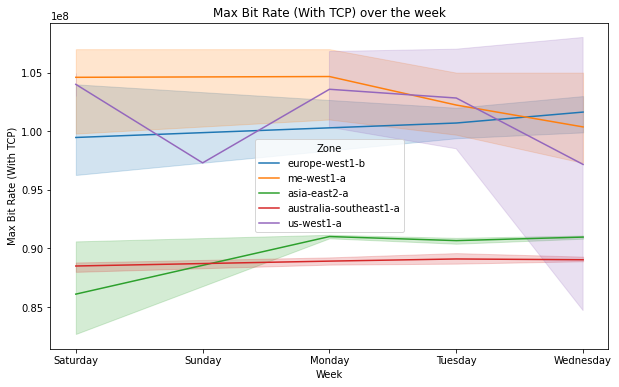

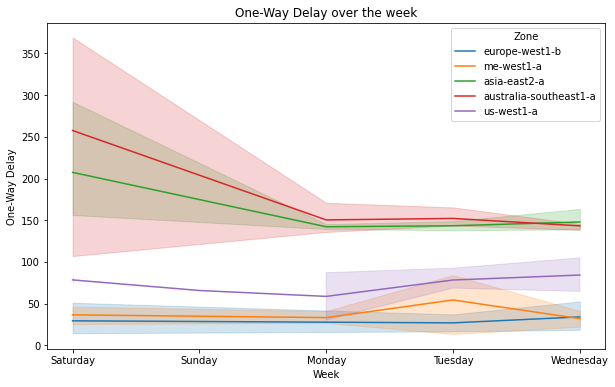

In [72]:
columns = ["Bandwidth", "Upload Jitter", "Download Jitter", "Upload Packet Loss", "Download Packet Loss",           
           "Upload Bit Rate (With TCP)", "Download Bit Rate (With TCP)", "Max Bit Rate (With TCP)", "One-Way Delay"]

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x='Week day', y=col, data=df, hue='Zone', ax=ax)
    ax.set_title(f"{col} over the week")
    ax.set_ylabel(col)
    ax.set_xlabel("Week")
    #ax.ticklabel_format(style='plain', axis='y')
    plt.show()
